<center>
<img src="https://imgs.xkcd.com/comics/convincing.png" height="250">

# Андан на экономе: домашнее задание 1
</center>


> И обратился я, и видел под солнцем,  <br>
> что не проворным достаётся успешный бег, <br>
> не храбрым — победа, <br>
> не мудрым — хлеб, <br>
> и не у разумных — богатство,  <br>
> и не искусным — благорасположение, <br>
> но время и случай для всех их. <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$ 🔥👩‍🚀☦️ **Екклесиаст 9:11**


In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1: скучная разминка (25 баллов)

__[5 баллов]__ Создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5.

- Найдите её след с помощью библиотечных функций.
- Найдите обратную к ней матрицу.

In [2]:
matrix = np.eye(5) * np.array([1, 2, 3, 4, 5])
matrix

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

In [3]:
#след матрицы
np.trace(matrix)

15.0

In [4]:
#обратная матрица
inv_matrix = np.linalg.inv(matrix)
inv_matrix

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

__[5 баллов]__ сгенерируйте случайную матрицу $X$ размера $4\times5$

- Найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$.
- Найдите произведение $X^TX$, его определитель и след.

In [5]:
#генерация матрицы
np.random.seed(42)
X = np.random.rand(4, 5) #случайная матрица, значения - из равномерного распределения на отрезке [0, 1]
print('Случайная матрица: ', X, sep = '\n')

Случайная матрица: 
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]]


In [6]:
#определитель подматрицы матрицы X
minor = X[1:3, 0:2]
print('Определитель подматрицы матрицы X', np.linalg.det(minor))

Определитель подматрицы матрицы X 0.15010500037401162


In [7]:
new_matrix = X.transpose().dot(X)
print('Произведение матриц: ', new_matrix, sep = '\n')
print('Определитель:', np.linalg.det(new_matrix))
print('След:', np.trace(new_matrix))

Произведение матриц: 
[[0.19867553 0.44090588 0.52265794 0.40158383 0.22604619]
 [0.44090588 1.94051986 1.71327514 0.94143383 0.4544146 ]
 [0.52265794 1.71327514 2.25440631 1.36231192 1.0317035 ]
 [0.40158383 0.94143383 1.36231192 0.95139564 0.68343847]
 [0.22604619 0.4544146  1.0317035  0.68343847 0.64358332]]
Определитель: 8.139993441208277e-21
След: 5.988580655388464


На паре мы говорили, что использования циклов (и самописных вычислений в целом) в python лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В следующих трёх заданиях нельзя пользоваться циклами вообще, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, напишите собственные тесты со случайными матрицами.

**[5 баллов]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [8]:
def prod_and_sq_sum(A):
    return np.array([(A.diagonal()**2).prod(), ((A.diagonal())**2).sum()])

In [12]:
#Демонстрация
np.random.seed(42)
shape = np.random.randint(low = 1, high = 7, size = (1))[0]
matrix = np.random.randint(low = 1, high = 10, size = (shape, shape))
print(f'Произведение {prod_and_sq_sum(matrix)[0]}, сумма {prod_and_sq_sum(matrix)[1]}')

#Тест 1
assert np.allclose(prod_and_sq_sum(matrix), np.array([8 **2 * 8**2 * 3**2 * 6**2,
                                                      8 **2 + 8 **2 + 3 **2 + 6**2]))

Произведение 1327104, сумма 173


In [10]:
#Тест 2
np.random.seed(42)
shape = np.random.randint(low = 1, high = 6, size = (1))[0]
matrix = np.random.uniform(low = 1, high = 10, size = (shape, shape))
#print(matrix)
assert np.allclose(prod_and_sq_sum(matrix), np.array([9.55642876**2 * 1.52275251**2 * 9.72918867**2 * 3.73818019**2,
                                                      9.55642876 **2 + 1.52275251 **2 + 9.72918867 **2 + 3.73818019**2]))

**[5 баллов]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k, n)}a_ib_i^T$$

__Ссылка__ https://stackoverflow.com/questions/65473095/numpy-test-if-each-value-in-row-in-row-of-another-array

In [37]:
def f(A, B, k):
    k = min(k, A.shape[0])
    A = A[:, : k].transpose()
    B = (B[:, : k]).transpose()
    arr = A[...,None] * B[:,None,:]
    return arr.sum(axis = 0)

In [38]:
x = np.array([[1, 2, 3], [4, 5, 6], [3, 8, 9]])
y = np.array([[0, 2, 4], [3, 5, 6], [6, 8, 9]])
k = 1
#Демонстрация результата
print(f(x, y, 2))

#Для проверки
A = x[:, : k]
B = (y[:, : k]).transpose()

assert np.allclose(f(x, y, k), A.dot(B))

[[ 4 13 22]
 [10 37 64]
 [16 49 82]]


In [44]:
#Тест 1
np.random.seed(42)
shape = np.random.randint(low = 1, high = 4, size = (1))[0]
A = np.random.randint(low = 1, high = 100, size = (shape, shape))
B = np.random.randint(low = 1, high = 100, size = (shape, shape))
k = 3
#print(A)
a_1 = A[:, 0].reshape(A.shape[0], 1)
a_2 = A[:, 1].reshape(A.shape[0], 1)
a_3 = A[:, 2].reshape(A.shape[0], 1)
b_1 = B[:,0].reshape(1, B.shape[0])
b_2 = B[:,1].reshape(1, B.shape[0])
b_3 = B[:,2].reshape(1, B.shape[0])
res = a_1.dot(b_1) + a_2.dot(b_2) + a_3.dot(b_3)
assert np.allclose(f(A, B, k), res)

In [45]:
#Тест 2
np.random.seed(43)
shape = np.random.randint(low = 1, high = 4, size = (1))[0]
A = np.random.randint(low = 1, high = 100, size = (shape, shape))
B = np.random.randint(low = 1, high = 100, size = (shape, shape))
k = 1

a_1 = A[:, 0].reshape(A.shape[0], 1)
b_1 = B[:,0].reshape(1, B.shape[0])
res = a_1.dot(b_1)
assert np.allclose(f(A, B, k), res)

**[5 баллов]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [47]:
def get_diag(A, B):
    A = np.transpose(A)
    return (A * B).sum(axis = 0) #это не матричное умножение, матрица матричного произведения AB не вычисляется

In [48]:
np.random.seed(42)
shape = np.random.randint(low = 1, high = 4, size = (1))[0]
A = np.random.randint(low = 1, high = 100, size = (shape, shape))
B = np.random.randint(low = 1, high = 100, size = (shape, shape))
assert np.allclose(get_diag(A, B), A.dot(B).diagonal())

In [49]:
np.random.seed(43)
shape = np.random.randint(low = 1, high = 4, size = (1))[0]
A = np.random.uniform(low = 1, high = 100, size = (shape, shape))
B = np.random.uniform(low = 1, high = 100, size = (shape, shape))
assert np.allclose(get_diag(A, B), A.dot(B).diagonal())

## Задача 2: про удачу и нашу жизнь (25 баллов)

Задача была вдохновлена [вот этим видео.](https://www.youtube.com/watch?v=3LopI4YeC4I)

Люди часто недооценивают роль случайности в своей жизни. Им кажется, что если они прокачают свои навыки и отдадутся полностью работе, они обязательно достигнут успеха. Люди забывают, что удача тоже важна. Иногда слишком.

Пусть у нас в выборке есть $10000$ кандидатов в космонавты. Из них только $10$ человек пройдут все испытания и приступят к тренировкам. Отбор в космонавты на $95\%$ зависит от навыков кандидата и на $5\%$ от его удачливости. Навыки и удачливость не зависят друг от друга.

__а) [5 баллов]__  Сгенерируйте навык каждого кандидата из равномерного распределения на отрезке $[0; 1]$. По аналогии сгенирируйте удачливость каждого кандидата. Итоговую величину, по которой будет производиться отбор в космонавты, рассчитайте по формуле:

$$
\text{score} = 0.95 \cdot \text{skill} + 0.05 \cdot \text{luck}.
$$

Повторите эту симуляцию $10^4$ раз. Оцените среднее значение удачливости тех, кто стал космонавтом. Постройте гистограмму для распределения удачи среди тех, кто стал космонавтом.

**Hint:** обратите внимание на функцию `np.argpartition`. Она поможет вам сделать код проще. Также обратите внимание, что в пунктах б) и в) нужно переиспользовать результаты симуляций из пункта а). Иначе код будет работать слишком долго.

In [50]:
np.random.seed(42)
uniform_rv = stats.uniform(0, 1)

skill = uniform_rv.rvs(size = (10**4, 10**4))
luck = uniform_rv.rvs(size = (10**4, 10**4))
score = 0.95 * skill + 0.05 * luck

score.shape

(10000, 10000)

In [51]:
astronaut_top_by_score_index = np.argpartition(score, kth= -10, axis=1)[:, -10:] #индексы космонавтов - топ 10 в каждом наблюдении
astronaut_top_by_score = np.take_along_axis(score, astronaut_top_by_score_index, axis = 1) #значения score для кандидатов, прошедших в космонавты
astronaut_top_by_score_luck = np.take_along_axis(luck, astronaut_top_by_score_index, axis = 1) #значения удачливости для кандидатов, прошедших в космонавты по score

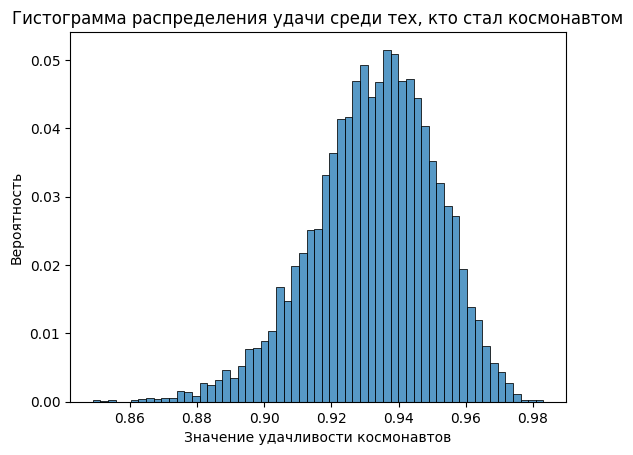

In [52]:
#средние значения удачливости космонавтов в каждом наблюдении
astronaut_top_by_score_luck = np.mean(np.take_along_axis(luck, astronaut_top_by_score_index, axis = 1), axis = 1)
sns.histplot(astronaut_top_by_score_luck, stat = 'probability')
plt.xlabel('Значение удачливости космонавтов')
plt.ylabel('Вероятность')
plt.title('Гистограмма распределения удачи среди тех, кто стал космонавтом');

__Выводы по графику:__ В среднем, с вероятностью в $50 \%$ среди тех, кто прошел в космонавты по score, встречаются значения $0.93-0.94$. Среди тех, кто прошел в космонавты по score, значение удаливости высоко, оно сконцентрировано в последней десятке возможных значений, что говорит о том, что влияние удачливости на возможность прохождения в космонавты значительно.

В целом, распределение напонимает асимметричное нормальное распределение со смещенным математическим ожиданием

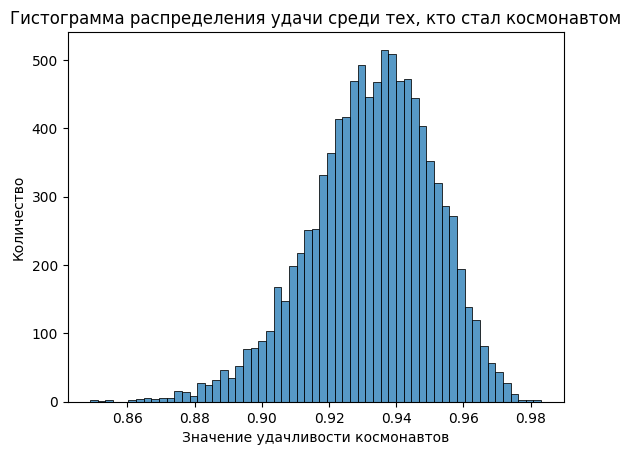

In [53]:
#гистограмма по количеству
sns.histplot(astronaut_top_by_score_luck, stat = 'count')
plt.xlabel('Значение удачливости космонавтов')
plt.ylabel('Количество')
plt.title('Гистограмма распределения удачи среди тех, кто стал космонавтом');

__б) [5 баллов]__  Отберите космонавтов по навыкам, `skill`. Оцените с помощью симуляций, на сколько в среднем человек топ кандидатов по `skill` пересекается с топом по `score`.

__Ссылка, откуда взята часть кода с bool_matrix__: https://stackoverflow.com/questions/65473095/numpy-test-if-each-value-in-row-in-row-of-another-array

__Первый способ__

In [54]:
#astronaut_top_by_score_index - индексы топов по score
astronaut_top_by_skill_index = np.argpartition(skill, kth = -10, axis = 1)[:, -10:] #индексы кандидатов - топ 10 по навыкам
n_obs = 10**4
bool_matrix = (astronaut_top_by_score_index[:,:, None] == astronaut_top_by_skill_index[:, None, :]).any(-1)
mean = np.mean(np.sum(bool_matrix, axis = 1))
print(f'В среднем на {mean} человек топ кандидатов по skill пересекается с топом по score')

В среднем на 1.8324 человек топ кандидатов по skill пересекается с топом по score


__Второй способ__

In [55]:
#astronaut_top_by_score_index - индексы топов по score
astronaut_top_by_skill_index = np.argpartition(skill, kth = -10, axis = 1)[:, -10:] #индексы кандидатов - топ 10 по навыкам
n_obs = 10**4 #количество наблюдений
sum = 0
for i in range(n_obs):
  sum += (np.intersect1d(astronaut_top_by_skill_index[i], astronaut_top_by_score_index[i])).size #подсчет пересечений топ кандидатов по skill и топ по score
print(f'В среднем на {sum / n_obs} человек топ кандидатов по skill пересекается с топом по score')

В среднем на 1.8324 человек топ кандидатов по skill пересекается с топом по score


__в) [5 баллов]__ А что будет, если мы будем отбирать больше космонавтов?

Для каждого $n$ от $10$ до $500$ с шагом в $10$ сделайте процедуру отбора в космонавты топ-$n$ кандидатов по `skill` и по `score`. Посчитайте, на сколько в среднем процентов отличаются эти топы. Изобразите получившуюсья зависимость на графике. По оси абсцисс отложите $n$, по оси ординат процент пересечения.

__Первый способ:__ без цикла, но дольше

In [56]:
#Вариант без циклов, но долгий
n_obs = 10**4
percent = []
n = np.arange(10, 501, 10) * (-1)
astronaut_top_by_skill_index = np.argpartition(skill, kth = n, axis = 1)
astronaut_top_by_score_index = np.argpartition(score, kth = n, axis = 1)

for num in range(10, 501, 10):
  astronaut_top_by_skill_index_temp = astronaut_top_by_skill_index[:, -num:] #отбираем топ n кандидатов по skill
  astronaut_top_by_score_index_temp = astronaut_top_by_score_index[:, -num:] #отбираем топ n кандидатов по score
  bool_matrix = (astronaut_top_by_score_index_temp[:,:, None] == astronaut_top_by_skill_index_temp[:, None, :]).any(-1)
  mean = np.mean(1 - (np.sum(bool_matrix, axis = 1) / num))
  percent.append(mean)
#print(percent)

__Второй способ:__с циклом, но быстрее

In [58]:
#Вариант с циклом, но быстрее
n_obs = 10**4
percent = []
n = np.arange(10, 501, 10) * (-1)
astronaut_top_by_skill_index = np.argpartition(skill, kth = n, axis = 1)
astronaut_top_by_score_index = np.argpartition(score, kth = n, axis = 1)

for num in range(10, 501, 10):
  astronaut_top_by_skill_index_temp = astronaut_top_by_skill_index[:, -num:] #отбираем топ n кандидатов по skill
  astronaut_top_by_score_index_temp = astronaut_top_by_score_index[:, -num:] #отбираем топ n кандидатов по score
  sum = 0
  for i in range(n_obs): #проходимся по каждому наблюдению и считаем долю отличия топов
    sum+= 1 - (np.intersect1d(astronaut_top_by_skill_index_temp[i], astronaut_top_by_score_index_temp[i]).size) / num #доля отличия
  percent.append(sum / n_obs)
#print(percent)

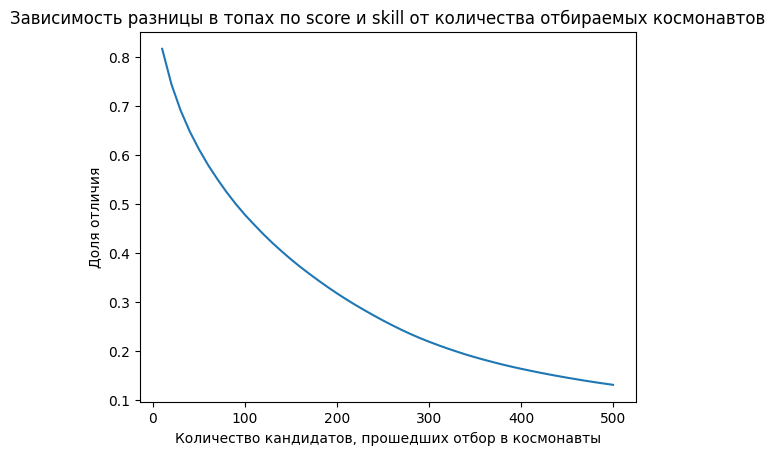

In [64]:
sns.lineplot(x =np.arange(10, 501, 10), y = percent)
plt.xlabel('Количество кандидатов, прошедших отбор в космонавты')
plt.ylabel('Доля отличия')
plt.title('Зависимость разницы в топах по score и skill от количества отбираемых космонавтов');

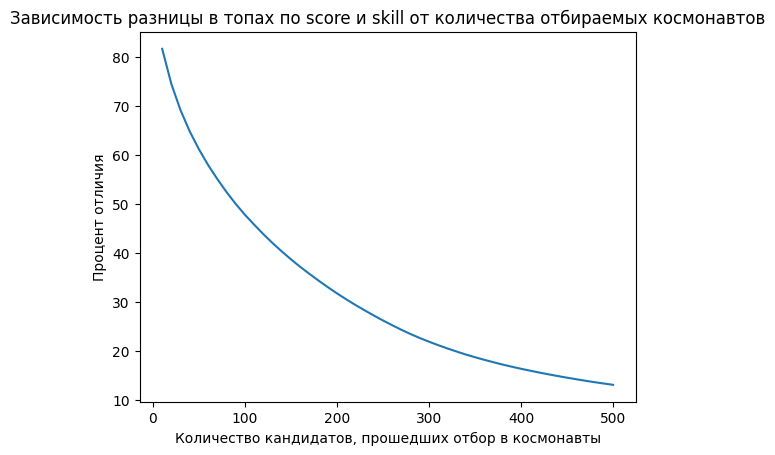

In [65]:
sns.lineplot(x =np.arange(10, 501, 10), y = np.array(percent) * 100)
plt.xlabel('Количество кандидатов, прошедших отбор в космонавты')
plt.ylabel('Процент отличия')
plt.title('Зависимость разницы в топах по score и skill от количества отбираемых космонавтов');

__Вывод по графику:__ С увеличением количества кандидатов, прошедших отбор в космонавты, разница в топ-кандидатов по score и skill уменьшается. То есть все большую роль начинает играть значение skill для того, чтобы пройти отбор. Если сначала для прохождения отбора необходимо было иметь и высокий skill, и высокое значение удавливости, то при большем n значение удачливости играет меньшую роль. Это можно увидеть также по графикам ниже

In [66]:
astronaut_top_by_score_index = np.argpartition(score, kth= [-10, -500], axis=1) #индексы космонавтов - топ 10 в каждом наблюдении
astronaut_top_by_skill_index = np.argpartition(skill, kth= [-10, -500], axis=1)

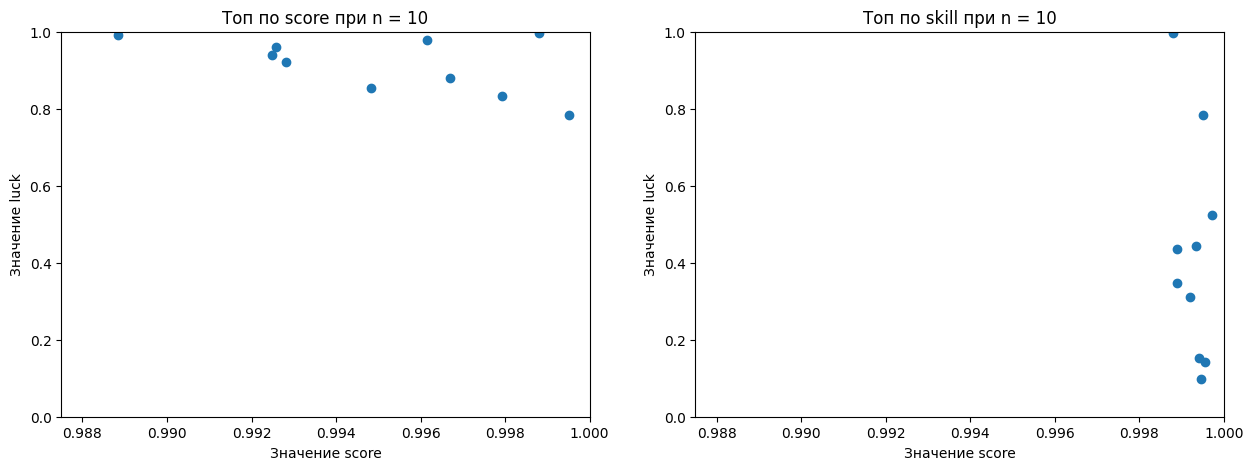

In [67]:
plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(np.take_along_axis(skill, astronaut_top_by_score_index[:, -10:], axis = 1)[0], np.take_along_axis(luck, astronaut_top_by_score_index[:, -10:], axis = 1)[0])
plt.xlim(0.9875, 1)
plt.ylim(0, 1)
plt.ylabel('Значение luck')
plt.xlabel('Значение score')
plt.title('Топ по score при n = 10')
plt.subplot(1, 2, 2)
plt.scatter(np.take_along_axis(skill, astronaut_top_by_skill_index[:, -10:], axis = 1)[0], np.take_along_axis(luck, astronaut_top_by_skill_index[:, -10:], axis = 1)[0])
plt.xlim(0.9875, 1)
plt.ylim(0, 1)
plt.ylabel('Значение luck')
plt.xlabel('Значение score')
plt.title('Топ по skill при n = 10');

__Вывод по графику:__ можно увидеть, что при маленьком n на то, чтобы попасть в топ по score, очень большое влияние оказывает значение удачливости, из-за которого многие из топа по skill не могут пройти отбор в космонавты

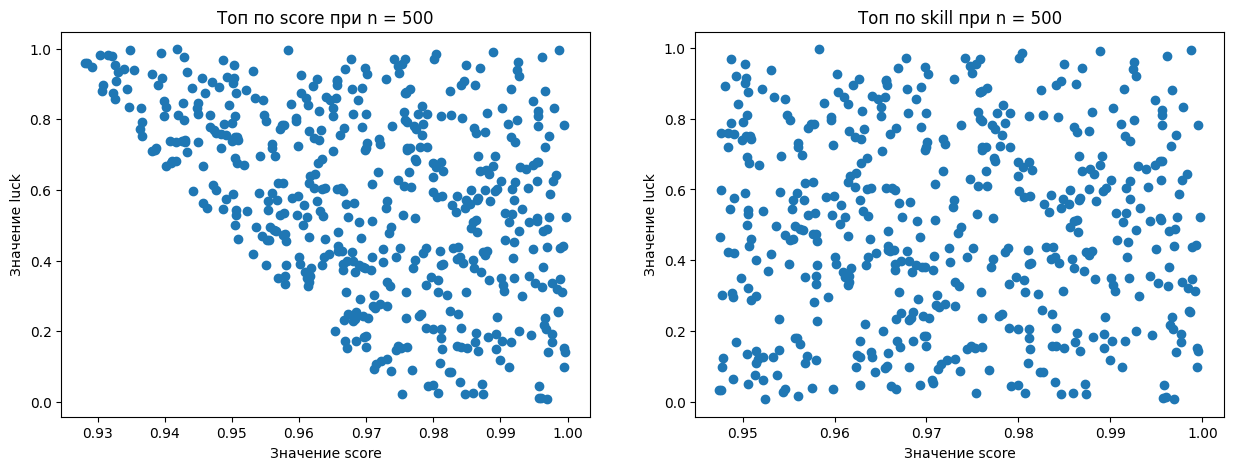

In [68]:
#astronaut_top_by_skill_index = np.argpartition(skill, kth = -500, axis = 1)[:, -500:]
#astronaut_top_by_score_index = np.argpartition(score, kth = -500, axis = 1)[:, -500:]

plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(np.take_along_axis(skill, astronaut_top_by_score_index[:, -500:], axis = 1)[0], np.take_along_axis(luck, astronaut_top_by_score_index[:, -500:], axis = 1)[0])
plt.ylabel('Значение luck')
plt.xlabel('Значение score')
plt.title('Топ по score при n = 500')

plt.subplot(1, 2, 2)
plt.scatter(np.take_along_axis(skill, astronaut_top_by_skill_index[:, -500:], axis = 1)[0], np.take_along_axis(luck, astronaut_top_by_skill_index[:, -500:], axis = 1)[0])
plt.ylabel('Значение luck')
plt.xlabel('Значение score')
plt.title('Топ по skill при n = 500');


__Вывод по графику:__ При большем n (=500) в топ по score уже входят кандидаты со значением luck, равным нулю. То есть можно пройти, если хотя бы один из пунктов (score или luck) имеет большое значение

__г) [5 баллов]__ Сделайте выводы из проделанных рассчётов.

__Ответ:__ Расчеты показывают, что значение удачливости играет большую роль при прохождении отбора. Особо большую значимость она имеет при отборе небольшого количества кандидатов, так как кандидатов, имеющих хорошие навыки много, становится значимым другой параметр. Однако при больших $n$ значение удачливости играет менее значимую роль и может быть перевешено значением навыков.

> Повод ли это грустить? Конечно же, нет. Если вы попытались схватиться за одну из возможностей и у вас ничего не вышло, забудьте об этом. Не впадайте в депрессию, продолжайте пытаться. В мире есть столько возможностей, которые можно упустить. Обидно будет, если вы не попробуете ещё. Рано или поздно удача вам улыбнётся ❤️❤️❤️

Давайте попробуем понять, когда именно она вам улыбнётся.

__д) [4 балла]__ Юра хочет стать космонавтом. У него довольно хорошо развиты навыки. Юра входит в $1\%$ лучших, его `score = 0.99` (Юра прокачал свои навыки до 0.99 и вообще не полагается на удачу). С какой вероятностью Юра станет космонавтом?

In [69]:
Yura_score = 0.99
prob = np.mean(np.min(astronaut_top_by_score, axis = 1) < Yura_score)
print('Вероятность, с которой Юра войдет в топ и станет космонавтом', prob)

Вероятность, с которой Юра войдет в топ и станет космонавтом 0.3894


__е) [1 балл]__ Юра пытается снова и снова. Сколько в среднем попыток ему надо сделать до первого успеха?

__Hint:__ тут не нужно ничего симулировать. Надо вспомнить про геометрическое распределение и его математическое ожидание.

In [70]:
print(f'В среднем Юре нужно сделать {stats.geom(prob).mean()} попыток, чтобы пройти в космонавты')
print('Способ расчета по формуле математического ожидания геометрического распределения', 1 / prob)

В среднем Юре нужно сделать 2.5680534155110424 попыток, чтобы пройти в космонавты
Способ расчета по формуле математического ожидания геометрического распределения 2.5680534155110424


## Задача 3: парадокс лифта (20 баллов)

[Райан Гослинг](https://www.youtube.com/watch?v=2jT71iFvpSM), [Стив Роджерс](https://www.youtube.com/watch?v=hLUdF8cjzyA) и [группа Radiohead](https://www.youtube.com/watch?v=QBGaO89cBMI) катаются на лифте.

В здании 30 этажей и лобби (нулевой этаж). Лифт только один и работает очень медленно. Он останавливается на каждом этаже по пути наверх, а затем на каждом этаже по пути вниз. Перемещение между этажами и ожидание пассажиров занимает минуту. Если лифт стартует с нулевого этажа в 8 утра, он в 08:30 доезжает до 30 и к 9 утра возвращается на первый этаж.

Проведите $10^4$ экспериментов и с их помощью ответьте на следующие вопросы:

__а) [5 баллов]__   Райан Гослинг в случайное время подходит к лифту на 3 этаже и ждёт его. Оцените вероятность того, что лифт приедет к Райану сверху.

In [72]:
np.random.seed(42)
n_obs = 10**4
uniform_rv = stats.uniform(0, 60)
sample = uniform_rv.rvs(n_obs)
prob = np.mean((sample > 3) * (sample < 57))
print(f'Вероятность того, что лифт приедет к Райану сверху {prob}')

Вероятность того, что лифт приедет к Райану сверху 0.9033


__Чуть-чуть объяснения логики:__ Важно, в какую именно минуту он подойдет к лифту, поэтому генерируем случайную величину - минуту подхода к лифту. Чтобы лифт подъехал сверху, Гослинг должен придти на три минуты позже с начала часа (потому что на третьей минуте лифт подъезжает к третьему этажу) и раньше, чем 57 минута часа (минута, в которую лифт подъезжает на третий этаж сверху), иначе лифт приедет снизу

__б) [5 баллов]__ Группа Radiohead в случайное время подходит к лифту на 25-ом этаже и ждёт его. Оцените вероятность того, что лифт приедет к группе Radiohead сверху.

In [73]:
#используем sample из первого пункта
prob = np.mean((sample > 25) * (sample < 35))
print(f'Вероятность того, что лифт приедет к группе Radiohead сверху {prob}')

Вероятность того, что лифт приедет к группе Radiohead сверху 0.1699


__Чуть-чуть объяснения логики:__ лифт подъезжает к 25-му этажу на 25 минуте. Группа должна пройти в промежутке от 25 до 35 минут (до тех пор, пока лифт не уехал вниз 25 этажа), чтобы лифт приехал к ним сверху

__в) [5 баллов]__  Постройте гистограммы времени ожидания лифта для Райана Гослинга и группы Radiohead. Похожи ли визуально распределения на нормальные? Насколько сильно они отличаются друг от друга?

In [74]:
time_gos = np.where(sample < 3, 3 - sample, 0) + np.where(sample > 57, 60 - sample + 3, 0) + np.where((sample > 3) & (sample < 57), 57 - sample, 0)
time_rd = np.where(sample <= 25, 25 - sample, 0) + np.where(sample > 35, 60 - sample + 25, 0) + np.where((sample > 25) & (sample <= 35), 35 - sample, 0)

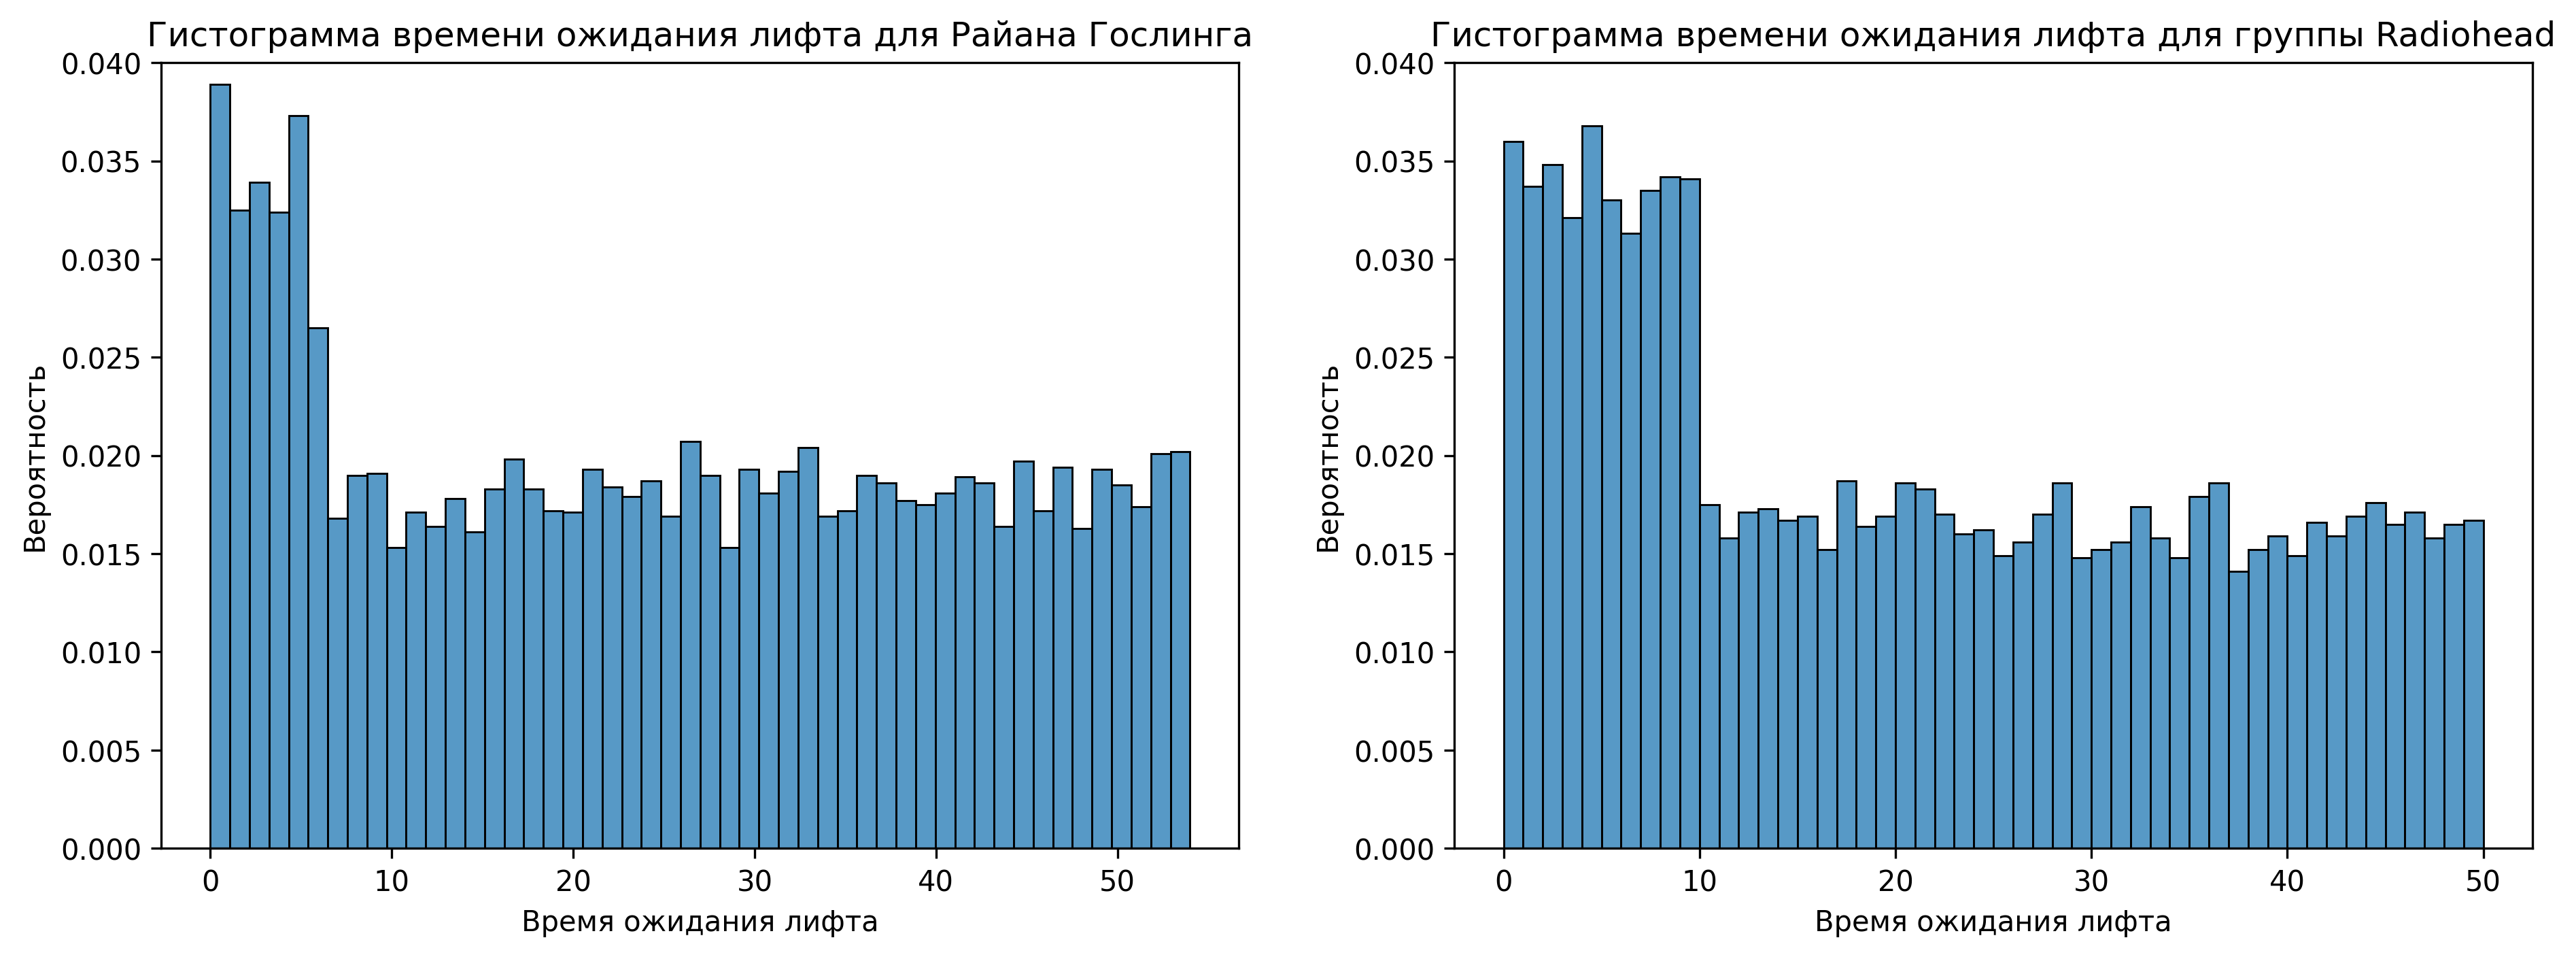

In [75]:
plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(1, 2, 1)
sns.histplot(time_gos, stat = 'probability', bins = 50)
plt.xlabel('Время ожидания лифта')
plt.ylabel('Вероятность')
plt.title('Гистограмма времени ожидания лифта для Райана Гослинга')
plt.ylim(0, 0.04)

plt.subplot(1, 2, 2)
sns.histplot(time_rd, stat = 'probability', bins = 50)
plt.xlabel('Время ожидания лифта')
plt.ylabel('Вероятность')
plt.title('Гистограмма времени ожидания лифта для группы Radiohead')
plt.ylim(0, 0.04);

__Выводы по графику:__ Распределения визуально не похожи на нормальные. Для Райана Гослинга наиболее характерная ситуация - ожидание от 0-5 минут (время ожидания с самой большой вероятностью. Для группы Radiohead чаще наиболее вероятное время ожидания составляет от 0 до 10 минут. В целом, остальное время ожидания лифта имеет более-менее сходую вероятность для обоих участников

__г) [5 баллов]__ У Стива Роджерса куча свободного времени и он катается на лифте весь день. Нарисуйте для Стива два графика:

- В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат отложите оценку вероятности того, что лифт придёт сверху.
- В первом по оси абсцисс отложите этаж, с которого стартует Стив, а по оси ординат среднее время ожидания лифта.

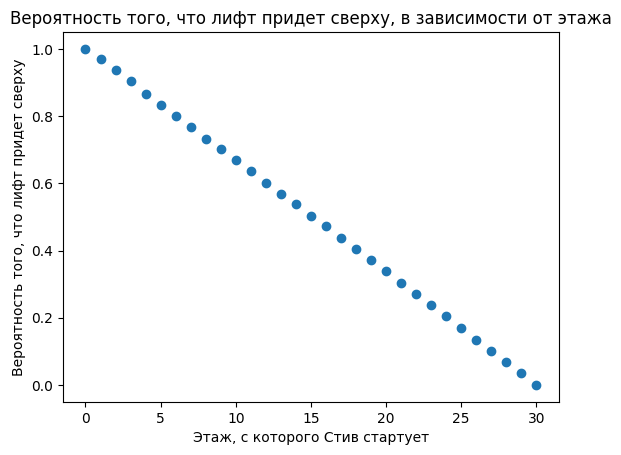

In [76]:
floor = np.arange(0, 31).reshape(-1, 1)
prob = np.mean((sample > floor) & (sample < 60 - floor), axis = 1)
plt.scatter(x = np.arange(0, 31), y = prob)
plt.xlabel('Этаж, с которого Стив стартует')
plt.ylabel('Вероятность того, что лифт придет сверху')
plt.title('Вероятность того, что лифт придет сверху, в зависимости от этажа');

__Вывод по графику:__Чем выше этаж, тем ниже вероятность того, что лифт приедет сверху (так как сверху меньшее число этажей будет)

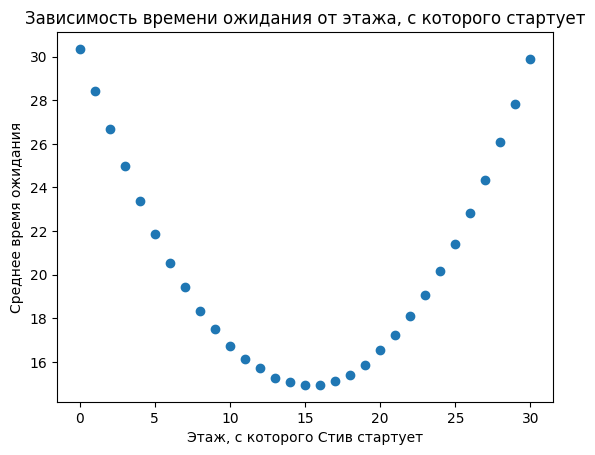

In [77]:
floor = np.arange(0, 31).reshape(-1, 1)
waiting_time = np.where(sample <= floor, floor - sample, 0) + np.where(sample > 60 - floor, 60 - sample + floor, 0) + np.where((sample > floor) & (sample < 60 - floor), 60 - floor - sample, 0)
waiting_time_mean = np.mean(waiting_time, axis = 1)
plt.scatter(x = np.arange(0, 31), y = waiting_time_mean)
plt.xlabel('Этаж, с которого Стив стартует')
plt.ylabel('Среднее время ожидания')
plt.title('Зависимость времени ожидания от этажа, с которого стартует');

__Вывод по графику:__среднее время ожидания увеличивается на крайних этажах (так как если пришел на крайний этаж и опоздал к лифту, то придется ждать от 30 до 60 минут, пока он доедет обратно). В среднем меньше всего времени ожидание занимает, если стартует на 15 этаже

Как думаете, будет ли наблюдаться что-то похожее в реальной жизни? Попробуйте понаблюдать за лифтом у себя дома и в офисе. На каком этаже вы живёте/работаете? Выполняется ли для вас [парадокс лифта?](https://en.wikipedia.org/wiki/Elevator_paradox)

Думаю, такое будет наблюдаться на самый высоких, например, этажах, однако в реальности есть много других факторов, которые на это вляют (лифты могут быть по-разному запрограммированы, например, может быть, что они должны будут возвращаться на первый этаж во время простойки, может быть, что на этаже вызов идет не ближайшего, а дальнего лифта)
Я живу на 13 этаже, думаю, парадокс выполняется отчасти

## Задача 4: паровозики (30 баллов)

От станции Ромашково друг за другом в одном направлении отходит $100$ паровозиков с интервалом в одну минуту. Стартовые скорости паровозиков -- независимые, равномерные на отрезке $[0;1]$ случайные величины. Когда более быстрый паровозик догоняет более медленный, он снижает свою скорость до скорости догнанного паровозика.

Через достаточно длинный интервал времени паровозики разобьются на несколько групп и далее число групп меняться не будет. Назовём это число групп финальным. Проведите $1000$ симуляций и найдите ответы на следующие вопросы:

__а) [5 баллов]__  Какова вероятность того, что пятый паровозик -- лидер очередной группы?

In [78]:
from toolz import compose

In [79]:
#Генерация sample
np.random.seed(42)
n_obs = 10**3
uniform_rv = stats.uniform(0, 1)
sample = uniform_rv.rvs(size= (n_obs, 100))

In [81]:
final_speed = np.minimum.accumulate(sample, axis = 1) #скорости каждого паровозика в группе = скорость в группе
fifth_speed = final_speed[:, 4][:, np.newaxis]
till_fifth_speed = final_speed[:, :4]
mean = np.mean(np.less(fifth_speed, till_fifth_speed).all(axis = 1))
print(f'Вероятность того, что пятый паровозик - лидер очередной группы: {mean}')

Вероятность того, что пятый паровозик - лидер очередной группы: 0.211


__б) [5 баллов]__ На сколько финальных групп в среднем разбиваются паровозики?

__Ccылка на источник кода с первой строки:__https://stackoverflow.com/questions/48473056/number-of-unique-elements-per-row-in-a-numpy-array

In [82]:
cnt_groups = np.apply_along_axis(compose(len, np.unique), axis = 1, arr = final_speed)
mean = np.mean(cnt_groups)
print(f'На {mean} финальных групп в среднем разбиваются паровозики')

На 5.19 финальных групп в среднем разбиваются паровозики


__в) [10 баллов]__ Нарисуйте усреднённое по симуляциям количество групп в зависимости от времени от старта. По горизонатльной оси — время, прошедшее от старта. По вертикальной оси — среднее число групп.

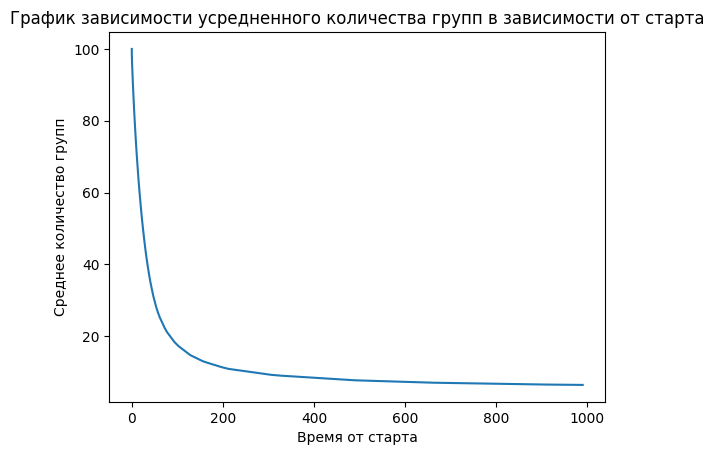

In [83]:
final_speed = np.minimum.accumulate(sample, axis = 1)
#считаю, что стартуют в одно времня, но с разных позиций (разница в позиция - расстояние прошедшее другим паровозиком, равное скорости, домноженной на 1)
start_positions = np.flip(np.add.accumulate(np.flip(sample, axis = 1), axis = 1), axis = 1)
distance_to_cover = np.zeros_like(final_speed)
#подсчет расстояния, необходимого, чтобы достичь паровозика - лидера
for row in range(10**3):
  ind = np.where(np.diff(final_speed[row])<0)[0] + 1
  unique_ind = np.hstack((0, ind))
  distance_to_cover_row = distance_to_cover[row]
  for index in unique_ind:
    distance_to_cover_row[final_speed[row] == final_speed[row, index]] = start_positions[row, index]
#подсчет времени, необходимого, чтобы достичь паровозика - лидера
time_to_leader = (distance_to_cover - start_positions) / np.where((sample - final_speed) == 0, 1, (sample - final_speed))

mean = []

for time in np.sort(time_to_leader[0]):
  mean.append(np.mean(100 - np.sum((time_to_leader < time) & (time_to_leader > 0), axis = 1)))
plt.plot(np.sort(time_to_leader[0]), mean)
plt.xlabel('Время от старта')
plt.ylabel('Среднее количество групп')
plt.title('График зависимости усредненного количества групп в зависимости от старта');

__Вывод по графику__ В районе 200 условных единиц времени от старта большинство паровозиков расформировываются в группы, далее процесс замедляется и зависит от оставшихся паровозиков. Для полного расгруппирования требуется 1000 условных единиц времени в среднем

__г) [10 баллов]__  Оцените среднее время, в течение которого паровозики разбиваются на финальное число групп. Оцените для этой же случайной величины дисперсию.

In [86]:
final_speed = np.minimum.accumulate(sample, axis = 1)
start_positions = np.flip(np.add.accumulate(np.flip(sample, axis = 1), axis = 1), axis = 1)
distance_to_cover = np.zeros_like(final_speed)
for row in range(10**3):
  ind = np.where(np.diff(final_speed[row])<0)[0] + 1
  unique_ind = np.hstack((0, ind))
  distance_to_cover_row = distance_to_cover[row]
  for index in unique_ind:
    distance_to_cover_row[final_speed[row] == final_speed[row, index]] = start_positions[row, index]
time_to_leader = (distance_to_cover - start_positions) / np.where((sample - final_speed) == 0, 1, (sample - final_speed))
max = np.max(time_to_leader, axis = 1) #берется максимальное время из всех необходимых для паровозиков в каждом наблюдении, чтобы они разбились на группы
print('Среднее время:', np.mean(max))
print('Диперсия',np.std(max))

Среднее время: 8397.618472711725
Диперсия 51484.798059166606
